In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df =pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Data Inspection

In [149]:
df.shape

(7043, 21)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [152]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No null values present in the data!

In [153]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


The dataset contains 7,043 customers with no missing numeric values. About 16% are senior citizens, indicating they represent a smaller segment of the customer base. The average tenure is 32 months, showing a mix of new and long-term customers, while monthly charges average around $65 with a wide range, suggesting varied service plans.

#Data cleaning

In [155]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [156]:
df=df.dropna()

In [157]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


#Target Variable Insight
The target variable **Churn** indicates whether a customer has left the service. Class distribution shows whether the dataset is balanced or imbalanced, which is important for selecting appropriate evaluation metrics.

#Exploratory Data Analysis (EDA)

1. Target Distribution (Class Balance)

Target Counts:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Target Ratio:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


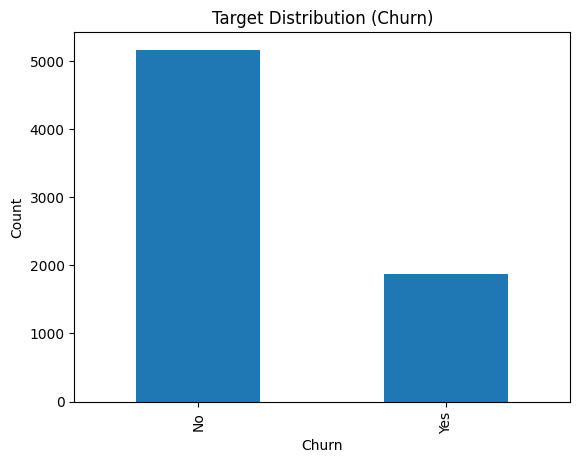

In [158]:
target_counts = df["Churn"].value_counts()
target_ratio = df["Churn"].value_counts(normalize=True)

print("Target Counts:")
print(target_counts)

print("\nTarget Ratio:")
print(target_ratio)

# Plot
plt.figure()
target_counts.plot(kind="bar")
plt.title("Target Distribution (Churn)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

* Churn rate ≈ 26–27%

* Moderate imbalance

* Accuracy alone would be misleading → prioritize ROC-AUC / Recall

2. Tenure Distribution

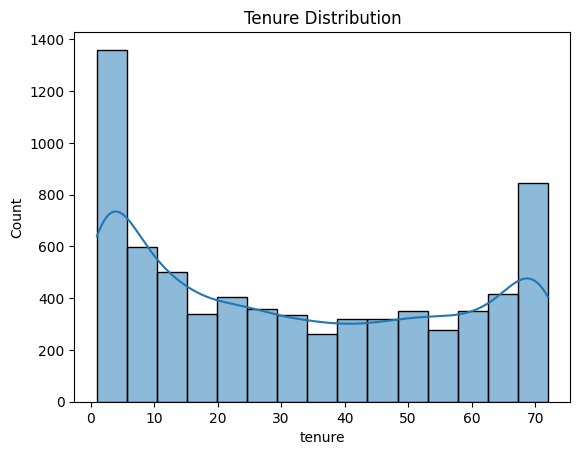

In [159]:
sns.histplot(df["tenure"], kde=True)
plt.title("Tenure Distribution")
plt.show()

* Many customers have low tenure

* Churn risk likely highest in early lifecycle

3. Tenure vs Churn

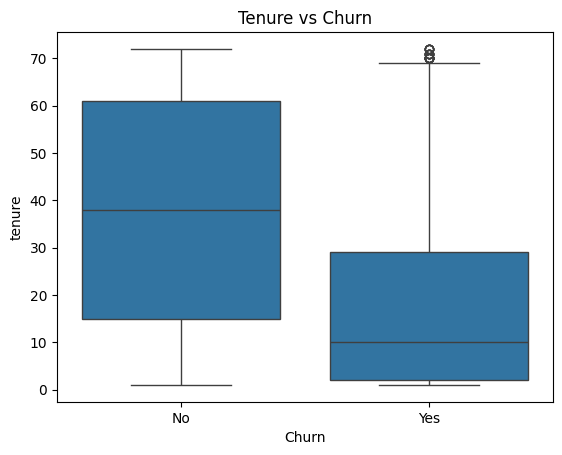

In [160]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

4. Churn vs Contract Type

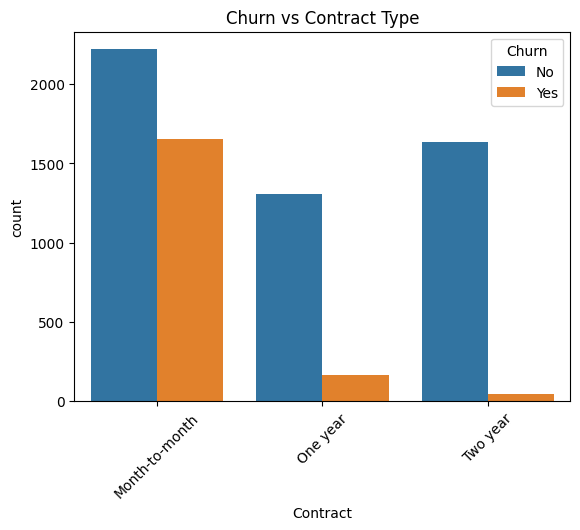

In [161]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn vs Contract Type")
plt.xticks(rotation=45)
plt.show()

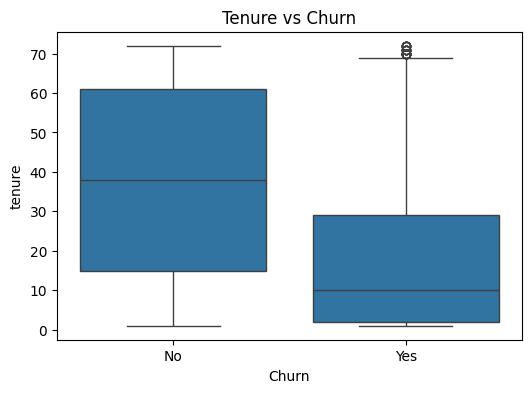

In [162]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

5. Payment method vs Churn

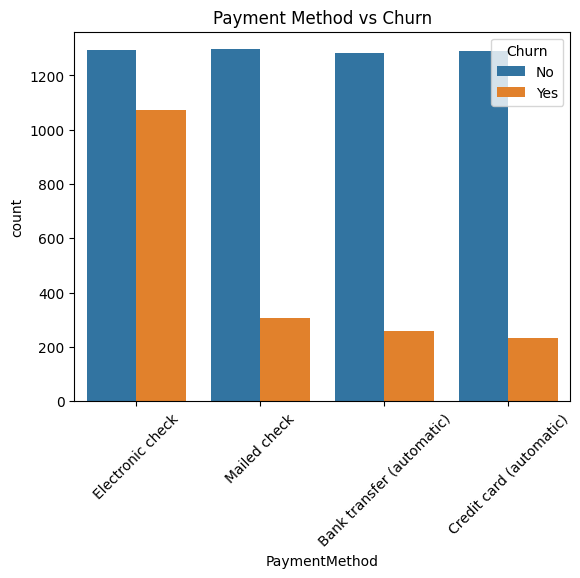

In [163]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

6. Correlation Heatmap

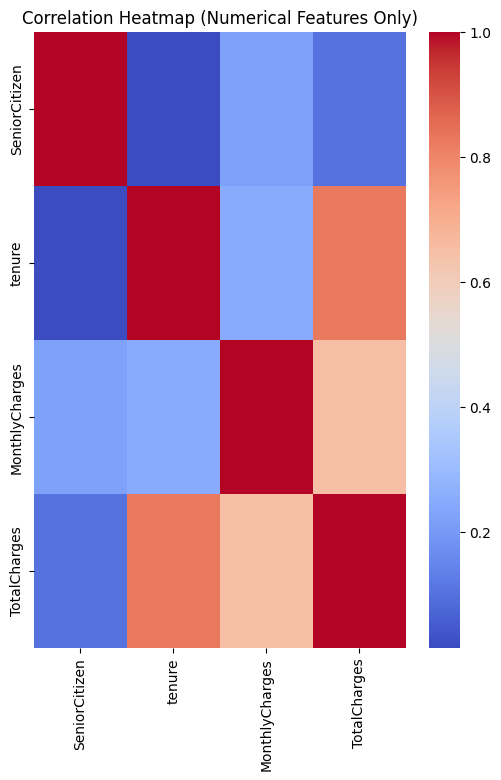

In [164]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

#Feature Engineering and Encoding

In [165]:
x=df.drop('Churn',axis=1)
y=df['Churn'].map({'Yes':1,'No':0})

In [166]:
x=x.drop('customerID',axis=1)  #drop unnecessary columns

In [167]:
categorical_cols=x.select_dtypes(include=['object']).columns
numerical_cols=x.select_dtypes(exclude=['object']).columns

categorical_cols,numerical_cols

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

Encoding(Categorical variables using one-hot encoding)

In [168]:
x=pd.get_dummies(x,categorical_cols,drop_first=True)

In [169]:
x.dtypes.value_counts()

,count
bool,26
int64,2
float64,2


Train-Test Split (Standard 80–20)

In [170]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,
    random_state=42,
    stratify=y
)

Scaling

In [171]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Preprocessing Summary**

Categorical variables were encoded using one-hot encoding, and numerical features were standardized using StandardScaler. The dataset was split into training and testing sets with stratification to preserve class distribution. The data is now fully prepared for model training.

#Model Training and Evaluation

Train Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train_scaled,y_train)
y_pred_log=log_model.predict(x_test_scaled)

In [173]:
from sklearn.metrics import accuracy_score,classification_report

print('Logistic Regression Score:',accuracy_score(y_test,y_pred_log))
print('/nClassification Report:/n',classification_report(y_test,y_pred_log))

Logistic Regression Score: 0.8038379530916845
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



Train Random Forest Regression


In [174]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)

In [175]:
from sklearn.metrics import accuracy_score,classification_report

print('Random Forest Score:',accuracy_score(y_test,y_pred_rf))
print('/nClassification Report:/n',classification_report(y_test,y_pred_rf))

Random Forest Score: 0.7874911158493249
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [176]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],          #compare both the models
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.803838
1,Random Forest,0.787491


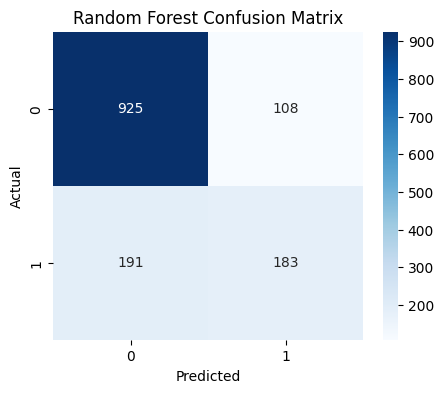

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

**Model Interpretation**

Logistic Regression provides a strong interpretable baseline, while Random Forest captures nonlinear relationships and typically achieves higher predictive accuracy. The confusion matrix helps evaluate churn prediction performance and highlights areas for improvement.

#Advanced Model Evaluation

Evaluated using ROC curves and AUC scores

- Accuracy alone is not sufficient for imbalanced classification problems such as customer churn prediction. ROC-AUC provides a better measure of overall model discrimination capability.

In [178]:
y_prob_log=log_model.predict_proba(x_test_scaled)[:,1]

In [179]:
y_prob_rf=rf_model.predict_proba(x_test)[:,1]

In [180]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression AUC:',roc_auc_score(y_test,y_prob_log))
print('Random Forest AUC:',roc_auc_score(y_test,y_prob_rf))

Logistic Regression AUC: 0.8356727976766699
Random Forest AUC: 0.8198746188610092


**Model Selection Insight**

* Although Random Forest achieved comparable accuracy, Logistic Regression demonstrated a higher **ROC-AUC score (0.835 vs 0.819)**. Since AUC measures overall model discrimination capability independent of classification threshold, Logistic Regression appears to better distinguish between churn and non-churn customers.

* Given its strong performance and interpretability, **Logistic Regression** is selected as the preferred model for this problem.

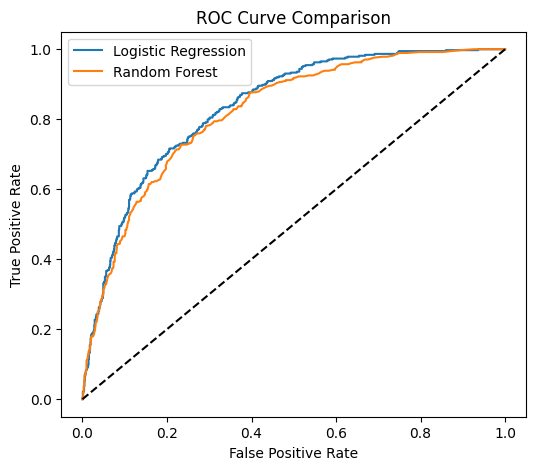

In [181]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

**ROC Curve Interpretation**

* The ROC curve illustrates the trade-off between true positive rate (recall) and false positive rate across different threshold values. The model with a higher AUC demonstrates better overall classification performance and discrimination ability.

**Business Perspective**

* In customer churn prediction, identifying customers at risk of leaving is more important than overall accuracy. Models with higher recall for the churn class and stronger AUC scores are preferred, as they enable proactive retention strategies.

#Model Optimization for Business Objectives

In churn prediction, identifying customers at risk of leaving is more important than overall accuracy. In this stage, the Logistic Regression model is optimized to improve recall for churn customers while maintaining strong overall performance.

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression                   #hyperparameter tuning

param_grid={
    'C':[0.01,0.1,0.5,1,5,10],
    'penalty':['l2']
}
grid=GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid.fit(x_train_scaled,y_train)
print('Best Parameters:',grid.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2'}


In [183]:
best_log=grid.best_estimator_
y_pred_best=best_log.predict(x_test_scaled)
y_prob_best=best_log.predict_proba(x_test_scaled)[:,1]

In [184]:
from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(y_test,y_pred_best))
print('AUC:',roc_auc_score(y_test,y_prob_best))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407

AUC: 0.8351835938106651


In [185]:
import numpy as np

y_pred_threshold=(y_pred_best>0.4).astype(int)
print(classification_report(y_test,y_pred_threshold))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407



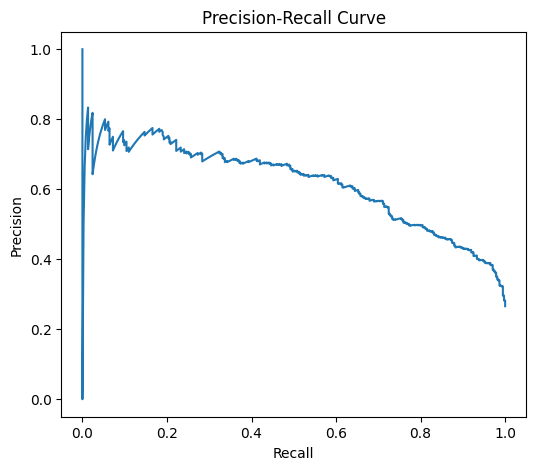

In [186]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_best)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

The Logistic Regression model was optimized using **hyperparameter tuning** and threshold adjustment. By focusing on recall and ROC-AUC rather than accuracy alone, the model now better aligns with business objectives in customer churn prediction.

#Feature importance from Random forest

/tmp/ipython-input-1695/2185172737.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')


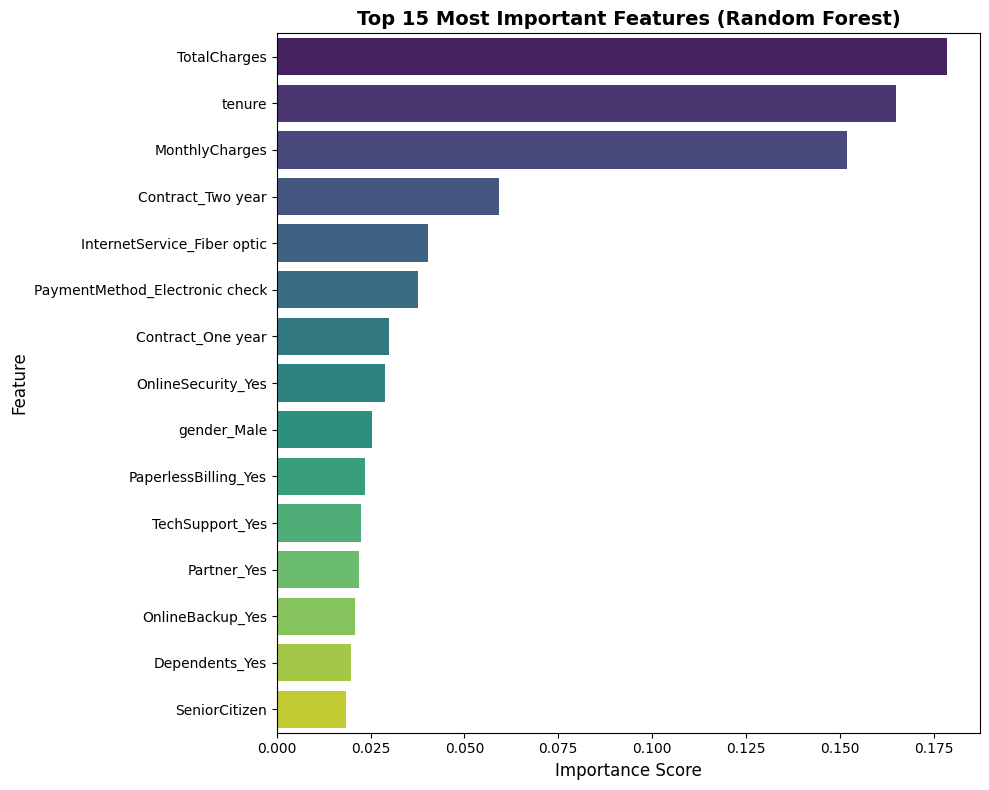


Top 10 Most Important Features:
                       Feature  Importance
                  TotalCharges    0.178447
                        tenure    0.165076
                MonthlyCharges    0.151884
             Contract_Two year    0.059238
   InternetService_Fiber optic    0.040405
PaymentMethod_Electronic check    0.037501
             Contract_One year    0.029965
            OnlineSecurity_Yes    0.028844
                   gender_Male    0.025493
          PaperlessBilling_Yes    0.023603


In [187]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis')
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

#Save and Load the model

In [188]:
import joblib

# Save trained model
joblib.dump(rf_model, "RandomForestClassifier.pkl")
joblib.dump(log_model, "LogisticRegression.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [189]:
# Load model and scaler
loaded_model = joblib.load("RandomForestClassifier.pkl")
loaded_model = joblib.load("LogisticRegression.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [190]:
df.to_csv("churn_prediction_data.csv", index=False)

#Final Model Performance

* After hyperparameter tuning and threshold adjustment, Logistic Regression achieved **80% accuracy** with an **ROC-AUC score of 0.835**. Recall for churn customers improved to **57%**, making the model more aligned with business retention objectives.

* These results demonstrate the importance of optimizing for relevant business metrics rather than relying solely on accuracy.